In [1]:
import numpy as np
import matplotlib.pyplot as plt
import abc

In [2]:
l = 30
r = 5
n = 300
rn = 1

In [183]:
class Nosecone():        
    def __init__(self, radius, length,n=300, half = False):
        self.radius = radius
        self.length = length
        self.half = half
        self.n = n

class Conic (Nosecone):
    def __init__(self, radius,length):
        Nosecone.__init__(self,radius,length)
        self.y = np.linspace(0,self.length,self.n)
        self.x =(self.length-self.y) * (self.radius/self.length)
        self.x = np.hstack((-self.x,np.flip(self.x)))
        self.y = np.hstack((self.y,np.flip(self.y)))
        
class tanOgive (Nosecone):
    def __init__(self, radius,length):
        Nosecone.__init__(self,radius,length)
        # ogive radius
        self.phi = (self.radius**2 + self.length**2) / (2*self.radius)
        self.y = np.linspace(0,self.length,self.n)
        self.x = np.sqrt(self.phi**2 - self.y**2) + self.radius - self.phi
        self.x = np.hstack((-self.x,np.flip(self.x)))
        self.y = np.hstack((self.y,np.flip(self.y)))
        
class secOgive (Nosecone):
    def __init__(self, radius,length):
        Nosecone.__init__(self,radius,length)
        # ogive radius
        self.rho = (self.radius**2 + self.length**2) / (2*self.radius)
        alpha = np.arctan(self.radius/self.length) - np.arccos(np.sqrt(self.length**2 + self.radius**2)/(2*self.rho))

        self.y = np.flip(np.linspace(0,self.length,self.n))
        self.x = np.sqrt(self.rho**2 - (self.rho*np.cos(alpha) - (self.length-self.y))**2) + self.rho*np.sin(alpha)
        #if not self.half:
        self.x = np.hstack((-self.x,np.flip(self.x),))
        self.y = np.hstack((self.y,np.flip(self.y),))
        
class bluntOgive (Nosecone):
    def __init__(self, radius,length,rn):
        Nosecone.__init__(self,radius,length)
        self.rn = rn
        # ogive radius
        self.phi = (self.radius**2 + self.length**2) / (2*self.radius)
        self.y = np.flip(np.linspace(0,self.length,self.n))
        self.x = np.sqrt(self.phi**2 - self.y**2) + self.radius - self.phi

        self.y0 = np.sqrt((self.phi-self.rn)**2 - (self.phi-self.radius)**2)
        self.xt = (self.rn*(self.phi-self.radius)) / (self.phi-self.rn)
        self.yt = self.y0 + np.sqrt(self.rn**2 - self.xt**2)
        self.ya = self.y0 + self.rn

        j = self.y > self.yt
        self.x[j] = np.sqrt(self.rn**2 - (self.y0-self.y[j])**2)
        if not self.half:
            self.x = np.hstack((-self.x,np.flip(self.x),))
            self.y = np.hstack((self.y,np.flip(self.y),))
        
        print(self.y)
        print(self.x)

        

    


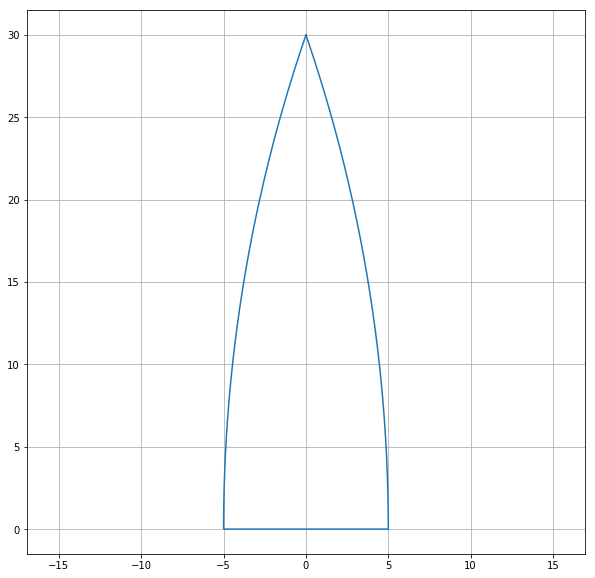

In [184]:
c = secOgive(radius=r,length=l)
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(c.x,c.y)
plt.grid()
plt.show()

## Tagent ogive

In [5]:
# ogive radius
phi = (r**2 + l**2) / (2*r)
y = np.linspace(0,l,num=n)
x = np.sqrt(phi**2 - y**2) + r - phi


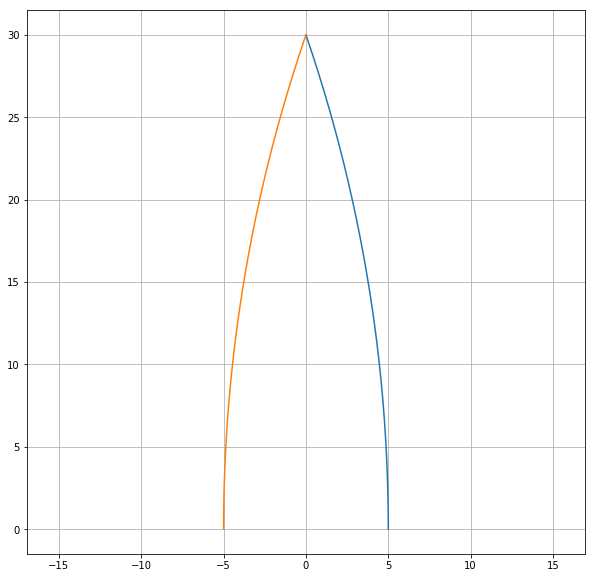

In [6]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)
plt.grid()
plt.show()

# Spherically blunted tangent ogive

In [7]:
# ogive radius
phi = (r**2 + l**2) / (2*r)

y0 = np.sqrt((phi-rn)**2 - (phi-r)**2)
xt = (rn*(phi-r)) / (phi-rn)
yt = y0 + np.sqrt(rn**2 - xt**2)
ya = y0 + rn

y = np.linspace(0,ya,num=n)
x = np.sqrt(phi**2 - (y)**2) + r - phi
j = y>yt
x[j] = np.sqrt(rn**2 - (y0-y[j])**2)


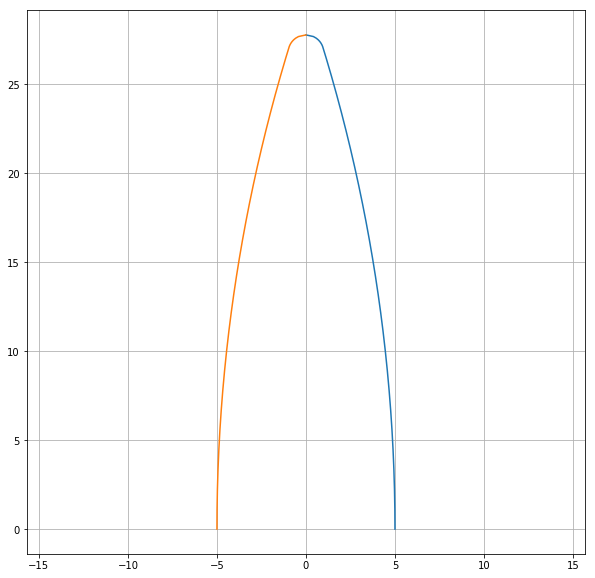

In [8]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Elliptic

In [9]:
y = np.linspace(0,l,num=n)
x = r * np.sqrt(1- (y**2/l**2) )

In [10]:
class Elliptical:
    def __init__(self, L,R,n):
        self.l = L
        self.r = R

    def y(self):
        return np.linspace(0,l,num=n)

    def x(self):
        return self.r * np.sqrt(1- (self.y**2/self.l**2) )

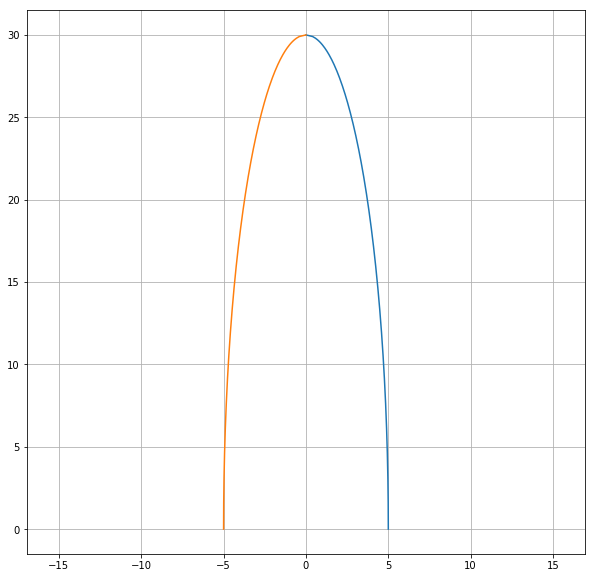

In [11]:
E = Elliptical(L=l,R=r,n=n)
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Parabolic

In [12]:
k = 3/4
y = np.linspace(0,l,num=n)
x = r * ((2*((l-y)/l) - (k*((l-y)/l)**2)) / (2-k))

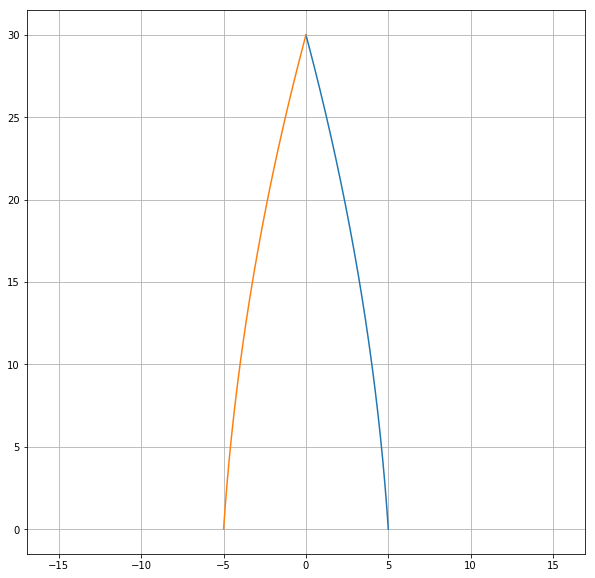

In [13]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Power Series

In [14]:
N=.5
assert N>0
assert N<1
k = 3/4
y = np.linspace(0,l,num=n)
x = r * ((l-y)/l)**N

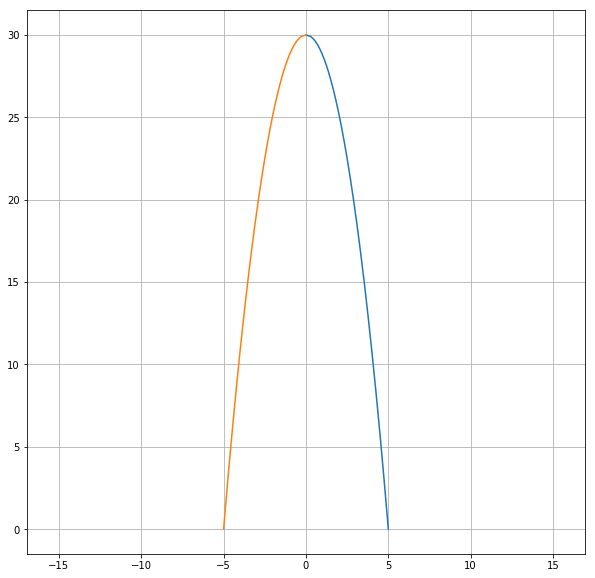

In [15]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Haack series

In [16]:
C = 1/3
y = np.linspace(0,l,num=n)

theta = np.arccos(1- (2*(l-y))/l)
x = (r / np.sqrt(np.pi)) * np.sqrt(theta - (np.sin(2*theta)/2) + (C*np.sin(theta)**3))

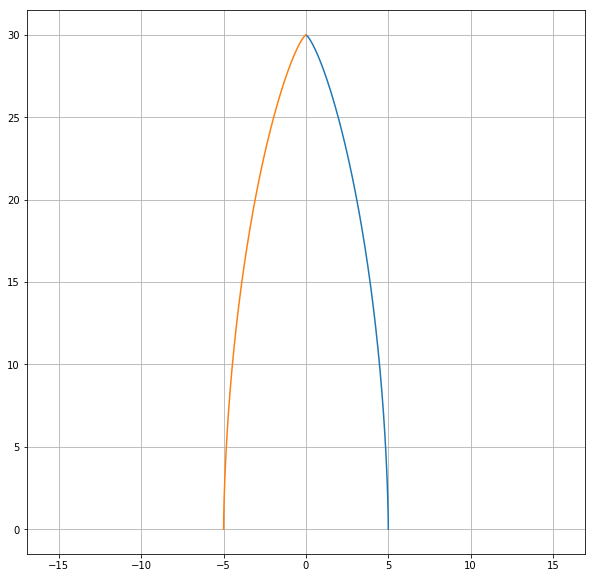

In [17]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Secant Ogive

In [18]:
# ogive radius
rho = (r**2 + l**2) / (2*r)
alpha = np.arctan(r/l) - np.arccos(np.sqrt(l**2 + r**2)/(2*rho))

y = np.linspace(0,l,num=n)
x = np.sqrt(rho**2 - (rho*np.cos(alpha) - (l-y))**2) + rho*np.sin(alpha)


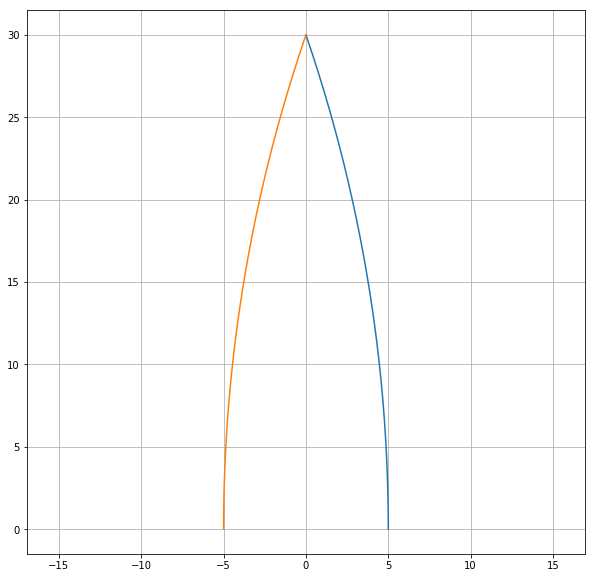

In [19]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Conic

In [20]:
# ogive radius
y = np.linspace(0,l,num=n)
x =(l-y) * (r/l)


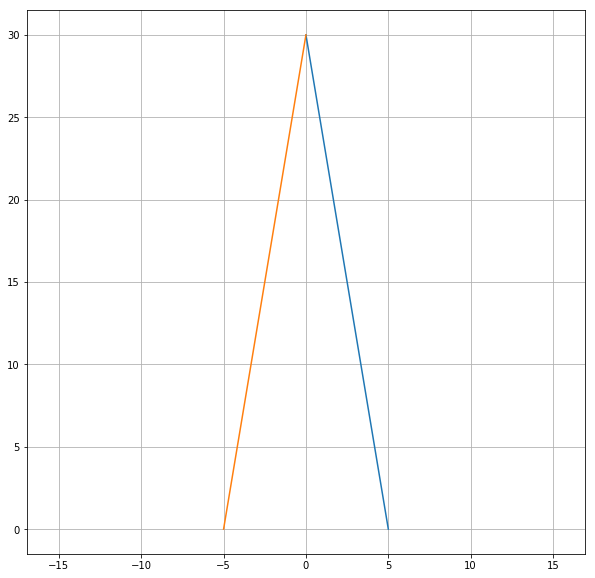

In [21]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()

# Blunt cone

In [22]:
# ogive radius
y = np.linspace(0,l,num=n)
x =(l-y) * (r/l)

yt =  l-(l**2 / r) * np.sqrt(rn**2 / (r**2 + l**2))
xt = (l-yt) * r / l
y0 = yt + np.sqrt(rn**2 - xt**2)
ya = y0 - rn

yy = np.linspace(0,l,num=n)
xx =(l-y) * (r/l)

j = y>yt
x[j] = np.sqrt(rn**2 - (y0-y[j])**2)


/home/ricardo/miniconda3/envs/orchestrator/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


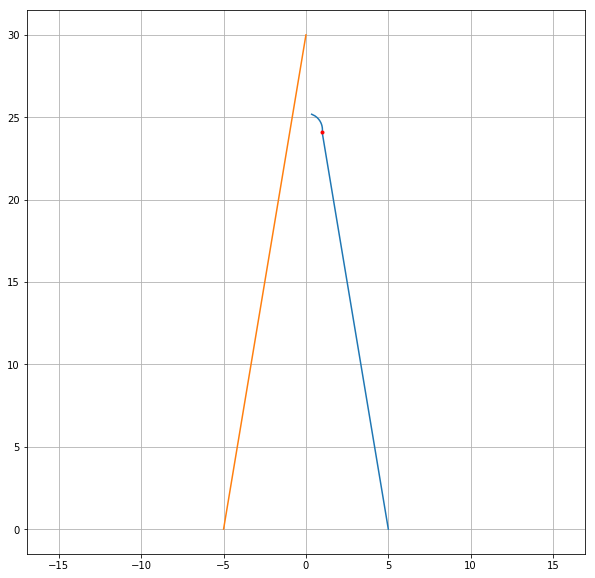

In [23]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-xx,yy)
plt.plot(xt,yt,'r.')
plt.grid()
plt.show()

# Bi-conic

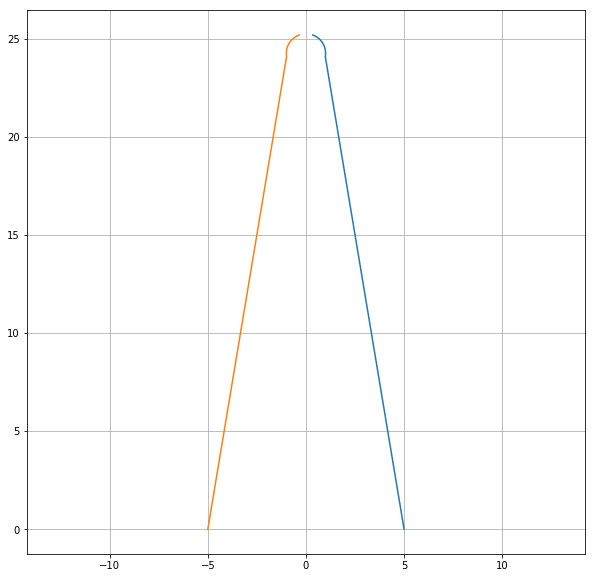

In [26]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(x,y)
plt.plot(-x,y)

plt.grid()
plt.show()